<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/CNN_and_computer_vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt

In [13]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-15 18:15:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.103.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  98.4MB/s    in 1.1s    

2022-05-15 18:15:18 (98.4 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



#inspect the data

In [ ]:
!ls pizza_steak 

test  train


In [ ]:
import os 
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))#getting our class names 
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_img(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (382, 512, 3)


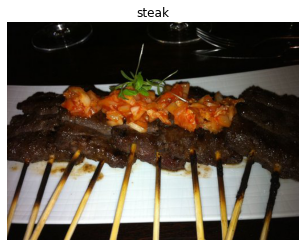

In [ ]:
img=random_img(target_dir="pizza_steak/train/",target_class="steak")

In [ ]:
tf.constant(img)   
img.shape# its return width ,height,color channels (RGB)


(382, 512, 3)

In [ ]:
#first model 
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
tf.random.set_seed(42)
#processing data 
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"
train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


in this exmaple we divided our imges to batches that our model see images in batches

In [ ]:
#creating model 
model1=tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense( 1,activation="sigmoid")
])
model1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history1=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 29s 290ms/step - loss: 0.5844 - accuracy: 0.7087 - val_loss: 0.4993 - val_accuracy: 0.7687
Epoch 2/5
47/47 [==============================] - 21s 448ms/step - loss: 0.4383 - accuracy: 0.8027 - val_loss: 0.3839 - val_accuracy: 0.8213
Epoch 3/5
47/47 [==============================] - 18s 375ms/step - loss: 0.4029 - accuracy: 0.8160 - val_loss: 0.3729 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 16s 348ms/step - loss: 0.3902 - accuracy: 0.8300 - val_loss: 0.3549 - val_accuracy: 0.8507
Epoch 5/5
47/47 [==============================] - 15s 312ms/step - loss: 0.3634 - accuracy: 0.8447 - val_loss: 0.3309 - val_accuracy: 0.8607


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#testing our previous Neural Network model on this data set

In [ ]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
tf.keras.layers.Flatten( input_shape=(224,224,3) ),                          
tf.keras.layers.Dense(4,activation="relu"),                            
tf.keras.layers.Dense(4,activation="relu"),                            
tf.keras.layers.Dense(1,activation="sigmoid")
])
model2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history2=model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 14s 288ms/step - loss: 1.7540 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 268ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 260ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 264ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 15s 316ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
#improving our model 2 (regular NN)
tf.random.set_seed(42)
model3=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(224,224,3))          ,                  
tf.keras.layers.Dense(100,activation="relu")                            ,
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(1,activation="sigmoid"),

])
model3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history3=model3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 399ms/step - loss: 3.9183 - accuracy: 0.6280 - val_loss: 0.8701 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 15s 333ms/step - loss: 0.8409 - accuracy: 0.7040 - val_loss: 0.5230 - val_accuracy: 0.7447
Epoch 3/5
47/47 [==============================] - 13s 280ms/step - loss: 0.7940 - accuracy: 0.6933 - val_loss: 0.4829 - val_accuracy: 0.7987
Epoch 4/5
47/47 [==============================] - 12s 262ms/step - loss: 0.6179 - accuracy: 0.7580 - val_loss: 0.6798 - val_accuracy: 0.7167
Epoch 5/5
47/47 [==============================] - 14s 302ms/step - loss: 0.5012 - accuracy: 0.7787 - val_loss: 0.4811 - val_accuracy: 0.7707


In [ ]:
model3.summary()
#regular NN model has 15M params  but our CNN has 30K params and our CNN accuracy is better 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (340, 512, 3)
Image shape: (341, 512, 3)


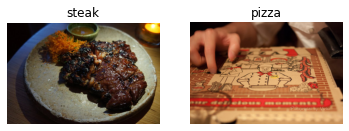

In [ ]:
#breaking down binary classification 
plt.figure()
plt.subplot(1,2,1)
steak_img=random_img("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img=random_img("pizza_steak/train/","pizza")


#preprocessing data 

In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"
# a batch is a small subset of data . 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen =ImageDataGenerator(rescale=1/255.)
test_datagen =ImageDataGenerator(rescale=1/255.)

In [ ]:
#Loading data and turn them to bathces 
train_data=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()
len(images),len(labels),len(train_data)


(32, 32, 47)

In [ ]:
#create a model
tf.random.set_seed(42)
model4=tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation="relu",input_shape=(224,224,3))  ,    #input layrs   , if "same", output shape is same as input shape, if "valid", output shape gets compressed             
# stride :the size of the step the sliding window takes across an input 
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1,activation="sigmoid")#output layers (for 1 out put , because we have binary classification)
])
model4.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history4=model4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))
# here our train_data is combination of x and y so we pass it one time 

Epoch 1/5
47/47 [==============================] - 15s 307ms/step - loss: 0.8571 - accuracy: 0.6133 - val_loss: 0.5563 - val_accuracy: 0.7093
Epoch 2/5
47/47 [==============================] - 13s 286ms/step - loss: 0.5078 - accuracy: 0.7540 - val_loss: 0.4429 - val_accuracy: 0.8007
Epoch 3/5
47/47 [==============================] - 14s 296ms/step - loss: 0.4475 - accuracy: 0.8013 - val_loss: 0.4487 - val_accuracy: 0.7747
Epoch 4/5
47/47 [==============================] - 14s 296ms/step - loss: 0.3866 - accuracy: 0.8413 - val_loss: 0.3425 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 14s 290ms/step - loss: 0.2688 - accuracy: 0.8967 - val_loss: 0.1535 - val_accuracy: 0.9547


In [ ]:
model4.evaluate(test_data)
model4.summary()

16/16 [==============================] - 2s 150ms/step - loss: 0.3927 - accuracy: 0.8120
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________

In [ ]:
model1.evaluate(test_data)

16/16 [==============================] - 2s 137ms/step - loss: 0.3019 - accuracy: 0.8780


[0.3018650412559509, 0.878000020980835]

### evaluate model


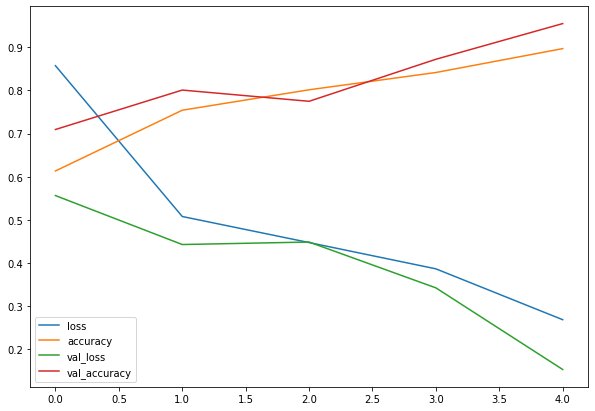

In [ ]:
import pandas as pd
#plot the loss curves
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [19]:
def plot_loss_curvse(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_valss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  # plot accuracy 
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

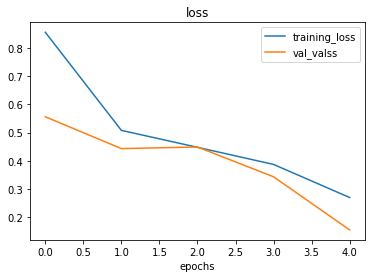

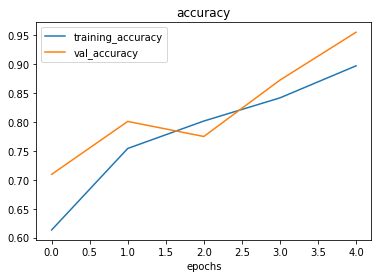

In [ ]:
plot_loss_curvse(history4)

**very important note :** when our validation_loss is not decreasing ( or starts to increase ) our model is **overfitting** 

In [ ]:
# create new model
model5=tf.keras.Sequential([
tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3))                            ,
tf.keras.layers.MaxPool2D(pool_size=2),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(),# maxpool finds the most important  parts of featuers of our image
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
model5.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history5=model5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 281ms/step - loss: 0.5889 - accuracy: 0.6727 - val_loss: 0.5433 - val_accuracy: 0.7407
Epoch 2/5
47/47 [==============================] - 13s 278ms/step - loss: 0.4930 - accuracy: 0.7687 - val_loss: 0.4549 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 16s 350ms/step - loss: 0.4345 - accuracy: 0.8093 - val_loss: 0.4009 - val_accuracy: 0.8207
Epoch 4/5
47/47 [==============================] - 15s 326ms/step - loss: 0.4105 - accuracy: 0.8147 - val_loss: 0.3868 - val_accuracy: 0.8373
Epoch 5/5
47/47 [==============================] - 15s 332ms/step - loss: 0.3838 - accuracy: 0.8327 - val_loss: 0.3633 - val_accuracy: 0.8473


In [ ]:
model5.evaluate(test_data)

16/16 [==============================] - 2s 136ms/step - loss: 0.3419 - accuracy: 0.8580


[0.3419305980205536, 0.8579999804496765]

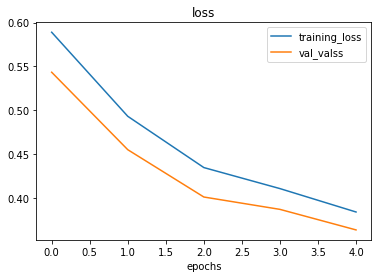

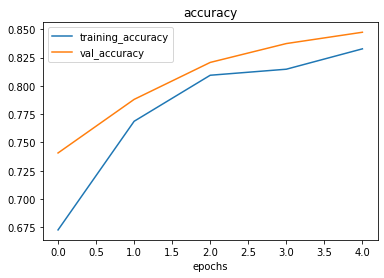

In [ ]:
#polt the model5 lost curve
plot_loss_curvse(history5)

#data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image? 

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

11
11


Text(0.5, 1.0, 'augmented data')

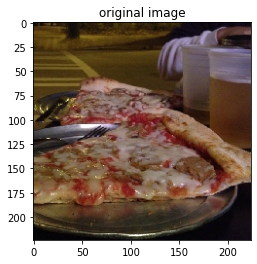

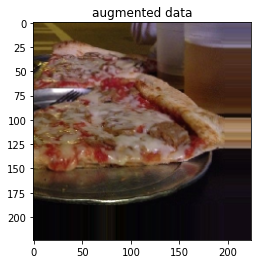

In [ ]:
import random
random_number=random.randint(0,32)
plt.imshow(images[random_number])
print(random_number)
plt.title("original image")
plt.figure()
plt.imshow(augmented_images[random_number])
print(random_number)
plt.title("augmented data")

In [21]:
#creating model with augmented data 
model6=tf.keras.Sequential([
tf.keras.layers.Conv2D(10,3,activation="relu")                            ,
tf.keras.layers.MaxPool2D(pool_size=2),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1,activation= "sigmoid")

])
model6.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history6=model6.fit(train_data_augmented,epochs=10,steps_per_epoch=len(train_data_augmented),validation_data=(test_data),validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 552ms/step - loss: 0.7202 - accuracy: 0.5153 - val_loss: 0.6783 - val_accuracy: 0.6580
Epoch 2/10
47/47 [==============================] - 25s 541ms/step - loss: 0.6891 - accuracy: 0.5647 - val_loss: 0.6674 - val_accuracy: 0.5640
Epoch 3/10
47/47 [==============================] - 25s 542ms/step - loss: 0.6898 - accuracy: 0.5827 - val_loss: 0.6476 - val_accuracy: 0.5700
Epoch 4/10
47/47 [==============================] - 25s 541ms/step - loss: 0.6623 - accuracy: 0.5740 - val_loss: 0.6051 - val_accuracy: 0.6220
Epoch 5/10
47/47 [==============================] - 26s 546ms/step - loss: 0.6136 - accuracy: 0.6940 - val_loss: 0.6094 - val_accuracy: 0.6280
Epoch 6/10
47/47 [==============================] - 25s 542ms/step - loss: 0.6371 - accuracy: 0.6760 - val_loss: 0.5165 - val_accuracy: 0.8120
Epoch 7/10
47/47 [==============================] - 25s 543ms/step - loss: 0.6106 - accuracy: 0.6847 - val_loss: 0.5006 - val_accuracy: 0.8080

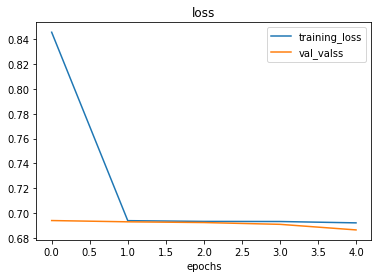

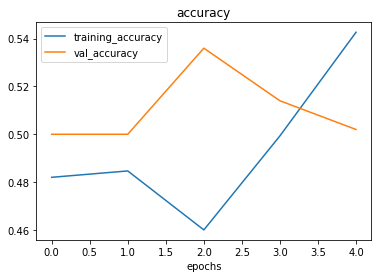

In [20]:
plot_loss_curvse(history6)